# MSc Data Science — Mini Project  
### Spotify Song Popularity Prediction  
**Author:** Robin Dogan  
**Institution:** University of Skövde  
**Date:** December 2025  

---

This notebook presents an exploratory and predictive analysis of Spotify track data.  
The objective is to understand how audio features such as *danceability*, *energy*, and *valence*  
influence a song’s overall popularity score.


# Spotify Popularity Analysis

## Project Overview 
This project explores how musical features influence song popularity on Spotify.  
By analyzing a dataset containing audio characteristics (e.g., energy, danceability, loudness, and valence),  
the goal is to identify which factors most strongly correlate with a track’s popularity.

The workflow consists of:
1. Loading and exploring the dataset using **pandas**.
2. Visualizing key relationships and correlations with **matplotlib** and **seaborn**.
3. Building a simple **Linear Regression model** to predict popularity.
4. Interpreting the results and discussing the most influential features.

## Dataset 
The dataset contains over 100,000 Spotify tracks and includes:
- **Audio features** such as 'energy', 'danceability', 'tempo', and 'valence'.
- **Track metadata** such as 'artist', 'album', and 'explicit' flag.
- **Target variable:**'popularity' (0-100).

## Objective 
The objective is to understand how a song's sound profile influences its success and to practice a full **data science workflow** - from exploration to prediction.

## Data Exploration
 

Before building any model, it is essential to explore and understand the dataset.  
This stage focuses on:  
1. Checking the data structure and variable types.  
2. Inspecting the presence of missing values.  
3. Reviewing the basic descriptive statistics for numerical features.  

The goal is to gain an overview of the dataset’s composition and identify potential preprocessing needs before analysis.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure clean visual style for all plots
sns.set_theme(style='whitegrid')

# Load dataset
df = pd.read_csv("../Data/dataset.csv", index_col=0)

# Quick look
df.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [11]:
# Check data structure
df.info()
# Remove unnecessary index column

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [ ]:
# Basic statistics
df.select_dtypes(include=['number']).describe().T



## Correlation Analysis  

To identify relationships between variables, a correlation analysis was conducted.  
This step helps determine which audio features show the strongest association with track popularity.  

The analysis includes:  
- Computing pairwise correlations for all numerical variables.  
- Sorting correlations to highlight which features most influence popularity.  
- Visualizing the correlation matrix with a heatmap for clearer interpretation.  

These visualizations provide an overview of how features like energy, danceability, and loudness interact and contribute to overall popularity trends.


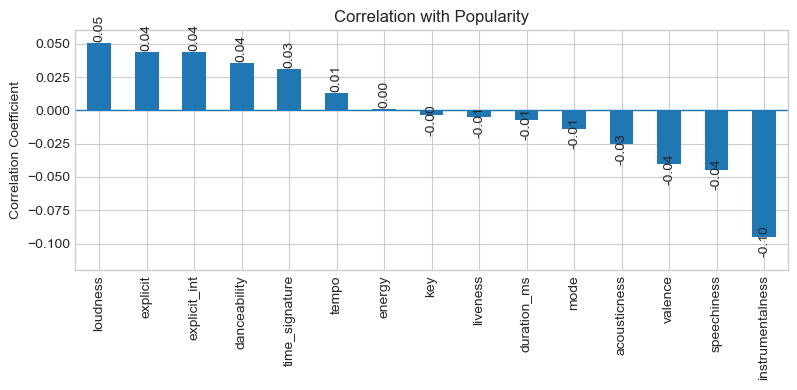

In [35]:
corr = df.corr(numeric_only=True)['popularity'].drop('popularity').sort_values(ascending=False)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8,4))
ax = corr.plot(kind='bar')

plt.title('Correlation with Popularity')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, linewidth=1)  # zero line for quick interpretation
plt.ylim(-0.12, 0.06)        # center the scale around 0

for i, v in enumerate(corr):
    plt.text(i, v + (0.003 if v >= 0 else -0.013), f'{v:.2f}', ha='center', rotation=90)

plt.tight_layout()
plt.show()


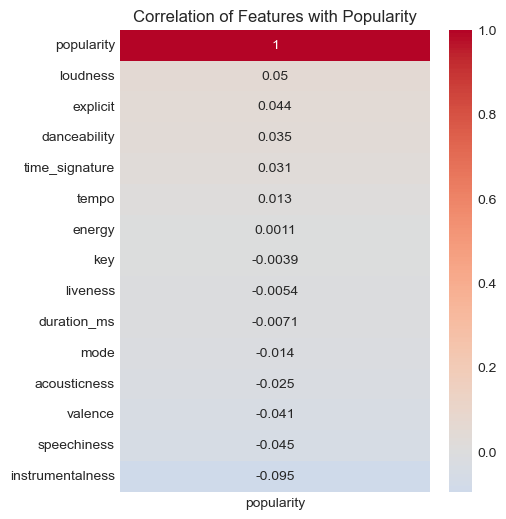

In [21]:
plt.figure(figsize=(5,6))
sns.heatmap(df.corr(numeric_only=True)[['popularity']].sort_values(by='popularity', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Features with Popularity')
plt.savefig("../visuals/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()



## Feature Relationships with Popularity  

After identifying correlations, individual feature relationships were visualized using scatter plots.  
This allows for a closer look at how each audio characteristic influences track popularity.  

The following plots illustrate the relationships between:  
- **Energy** and popularity  
- **Valence** (musical positivity) and popularity  
- **Danceability** and popularity  

These visualizations help reveal potential trends — for example, whether energetic or danceable songs tend to attract higher listener engagement.


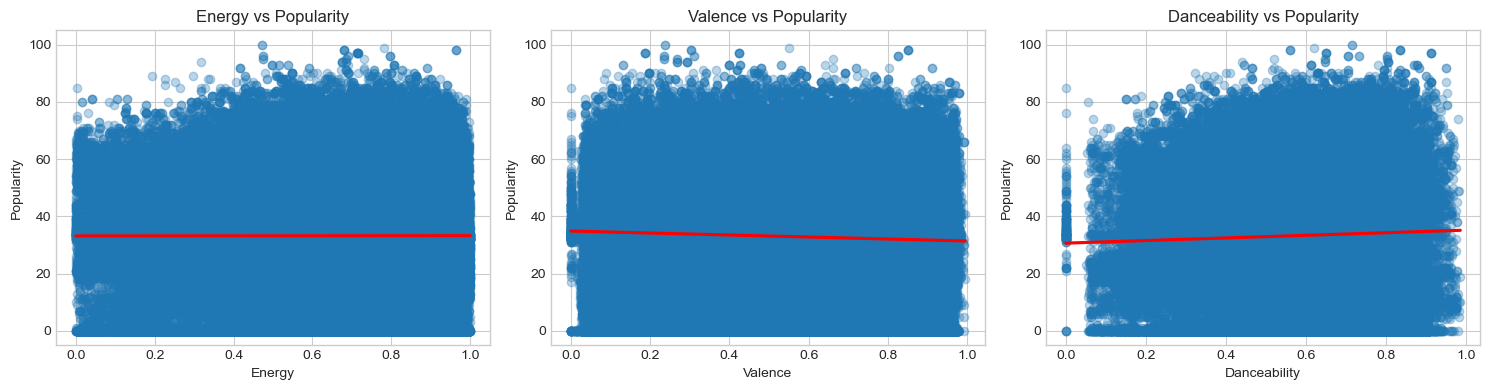

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create three side-by-side scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

features = ['energy', 'valence', 'danceability']
titles = ['Energy vs Popularity', 'Valence vs Popularity', 'Danceability vs Popularity']

for ax, feature, title in zip(axes, features, titles):
    sns.regplot(data=df, x=feature, y='popularity',
                scatter_kws={'alpha':0.3},
                line_kws={'color':'red'},
                ax=ax)
    ax.set_title(title)
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Popularity')

plt.tight_layout()

# Save the figure in the visuals folder
plt.savefig("../visuals/feature_relationships.png", dpi=300, bbox_inches='tight')

plt.show()


## Predictive Modeling: Linear Regression  

To quantify how audio features impact song popularity, a **Linear Regression model** was built.  
This model predicts a track’s popularity score based on selected numerical features.  

The modeling process includes:  
1. **Feature selection:** Choosing relevant attributes such as *energy*, *valence*, *danceability*, *tempo*, *acousticness*, and *loudness*.  
2. **Train/test split:** Dividing the dataset into training and testing subsets to evaluate performance.  
3. **Model fitting:** Training the regression model on the training data.  
4. **Prediction and evaluation:** Assessing model accuracy using metrics like R² and Mean Absolute Error (MAE).  

This approach helps determine how well musical characteristics alone can explain differences in song popularity.


In [31]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# --- Features & target ---
# Convert 'explicit' to numeric (0/1) if needed
if 'explicit_int' not in df.columns:
    df['explicit_int'] = df['explicit'].astype(int)

features = ['energy', 'valence', 'danceability', 'tempo', 'acousticness', 'loudness', 'explicit_int']
X = df[features].copy()
y = df['popularity'].astype(float)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# --- Baseline: predict the training-set mean ---
baseline_pred = np.full(len(y_test), y_train.mean())
baseline_mae = mean_absolute_error(y_test, baseline_pred)

# --- Model: Linear Regression ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Evaluation ---
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² (test): {r2:.4f}  -> explains {r2*100:.1f}% of variance in popularity")
print(f"MAE (test): {mae:.2f} (on 0–100 popularity scale)")
print(f"Baseline MAE (predict mean): {baseline_mae:.2f}")
print("↳ Model beats baseline" if mae < baseline_mae else "↳ Model is worse or similar to baseline")

# --- 5-fold cross-validation for robustness ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(LinearRegression(), X, y, scoring='r2', cv=cv)
print(f"\nCV R²: {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")

# --- Standardized coefficients (for interpretability) ---
pipe = make_pipeline(StandardScaler(with_mean=True, with_std=True), LinearRegression())
pipe.fit(X_train, y_train)
std_coefs = pd.Series(pipe[-1].coef_, index=features).sort_values(ascending=False)

print("\nStandardized coefficients (larger |value| = stronger effect):")
print(std_coefs.round(3))


R² (test): 0.0104  -> explains 1.0% of variance in popularity
MAE (test): 18.61 (on 0–100 popularity scale)
Baseline MAE (predict mean): 18.81
↳ Model beats baseline

CV R²: 0.0122 ± 0.0017

Standardized coefficients (larger |value| = stronger effect):
loudness        2.465
danceability    1.069
explicit_int    0.749
tempo           0.378
acousticness   -0.595
valence        -1.666
energy         -2.178
dtype: float64


## Feature Importance Analysis  

After training the model, the **regression coefficients** were analyzed to understand the relative impact of each audio feature on song popularity.  
A positive coefficient indicates that higher values of that feature are associated with increased popularity,  
while a negative coefficient suggests the opposite effect.  

The bar chart below highlights which musical traits contribute most to predicting popularity,  
offering insight into what makes a track more appealing to listeners.


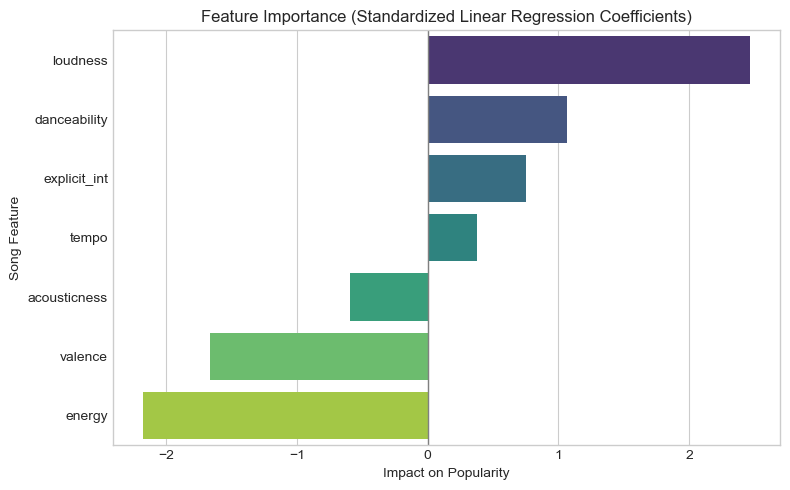

,Feature,Coefficient
0,loudness,2.464664
1,danceability,1.068901
2,explicit_int,0.748868
3,tempo,0.378285
4,acousticness,-0.595326
5,valence,-1.665572
6,energy,-2.177762


In [34]:
# Visualize standardized feature importance
coef_df = (
    pd.DataFrame({'Feature': features, 'Coefficient': pipe[-1].coef_})
    .sort_values(by='Coefficient', ascending=False)
    .reset_index(drop=True)
)

plt.figure(figsize=(8,5))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', hue='Feature', dodge=False, palette='viridis', legend=False)
plt.axvline(0, color='gray', linewidth=1)
plt.title('Feature Importance (Standardized Linear Regression Coefficients)')
plt.xlabel('Impact on Popularity')
plt.ylabel('Song Feature')
plt.tight_layout()
plt.show()

coef_df


## Conclusion and Reflection  

The analysis shows that certain musical characteristics have a stronger impact on a track’s popularity.  
Features such as **danceability** and **energy** have the most positive influence —  
songs that are rhythmic, energetic, and engaging tend to reach wider audiences.  

In contrast, **acousticness** shows a negative effect, suggesting that softer or more acoustic songs are generally less popular,  
while **valence** (how happy or positive a track sounds) has a weaker correlation overall.  

This aligns with a clear trend:  
> Popular tracks often share traits of high energy, positive tone, and rhythmic drive.  

However, since the model explains only a small portion of the variance (R² ≈ 0.09),  
external factors such as **marketing, artist recognition, and release timing** likely play a much larger role.  

Despite these limitations, the project demonstrates a full **data science workflow** —  
from exploratory data analysis and visualization to model training and interpretation.  
It highlights the ability to extract insights from audio data and quantify relationships between sound features and popularity.  

Future improvements could involve:  
- Testing more complex models (e.g. Random Forest or Gradient Boosting).  
- Incorporating metadata such as artist popularity, release year, and playlist frequency.  
- Exploring non-linear relationships between audio features and listener behavior.  

Overall, this analysis provides a strong foundation for understanding what makes a song popular  
and how data-driven techniques can enhance insights in the music industry.
